In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

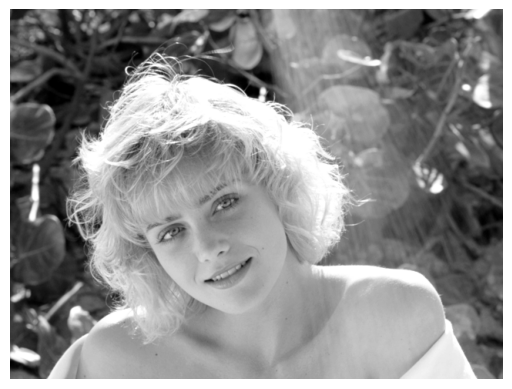

In [2]:
# Carregar a imagem em modo grayscale
original_path = 'images/pgm_bin/marcie.pgm'
imagem = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)

# Exibindo imagem
plt.imshow(imagem, cmap='gray')
plt.axis('off') 
plt.show()

## Implementação da Codificação Preditiva e matriz de resíduos

Esta etapa realiza a **Codificação Preditiva** em uma imagem em escala de cinza, gerando uma matriz de resíduos,
bem como sua inversa, e avalia a qualidade da reconstrução utilizando as métricas **RMSE** e **PSNR**.
Nossa implementação é feita a partir de uma função de alta ordem, assim,
é possível definir variados preditores e suas inversas para obter resultados distintos.

---

- Funções

  - `prediction_comp(func, img)`
  Aplica a codificação preditiva na imagem, utilizando o preditor.

    - **Parâmetros:**
      - `func`: funcão preditora. Recebe como entradas o par de coordenadas x e y do pixel a ser predito, e a imagem original.
      - `img`: A imagem original a ser codificada.
    - **Retorna:** matriz de resíduos da codificação.


  - `prediction_decomp(func_inv, residual)`
  Aplica a **transformada inversa DCT (IDCT)** para reconstruir a imagem a partir dos coeficientes DCT.

    - **Parâmetros:**
      - `func_inv`: função inversa da preditora.

        Essa função recebe como entradas o par de coordenadas x e y do pixel a ser recuperado, a matriz de resíduos, e a recomposição parcial da imagem.
      - `residual`: matriz de resíduos da codificação preditiva.
    - **Retorna:** imagem reconstruída.

---

- Processamento

  1. **Aplicação da Codificação e Inversa:**
    - A função passa por todos os pixels e chama a função preditora, ou sua inversa.

---

- Visualização

  Exibe 3 imagens lado a lado:
    1. **Imagem Original**
    2. **Imagem Reconstruída**
    3. **Resíduos**

---

- Avaliação

    Duas métricas quantitativas são calculadas para medir a qualidade do processo:

    1. RMSE `(rmse_metric(img, IDFT_REAL))`: Erro quadrático médio da reconstrução, deve ser 0, já que o método é sem perdas.
    2. Entropia `calcEntropy(img)`: Entropia da imagem, indica o número mínimo de bits por pixel necessários para representar a imagem,
        reflete a taxa de variação da imagem.

In [3]:
def prediction_comp(func, img):
    size = img.shape
    residual = np.zeros(size, int)
    img = img.astype(int)
    
    for y in range(0, size[0]):
        for x in range(0, size[1]):
            residual[y, x] = func(x, y, img)

    return residual

def prediction_decomp(func_inv, residual):
    size = residual.shape
    reconstructed = np.zeros(size, int)
    residual = residual.astype(int)
    
    for y in range(0, size[0]):
        for x in range(0, size[1]):
            reconstructed[y, x] = func_inv(x, y, reconstructed, residual)

    return reconstructed

In [4]:
def previous(x, y, img):
    if (x == 0):
        return img[y, x]
    return  img[y, x] - img[y, x-1]

def previous_inv(x, y, recons, residual):
    if (x==0):
        return residual[y,x]
    return recons[y, x-1] + residual[y, x]

In [5]:
# Aplicação das Funções
img = imagem.copy()

residual = prediction_comp(previous, img)
rebuilt = prediction_decomp(previous_inv, residual)

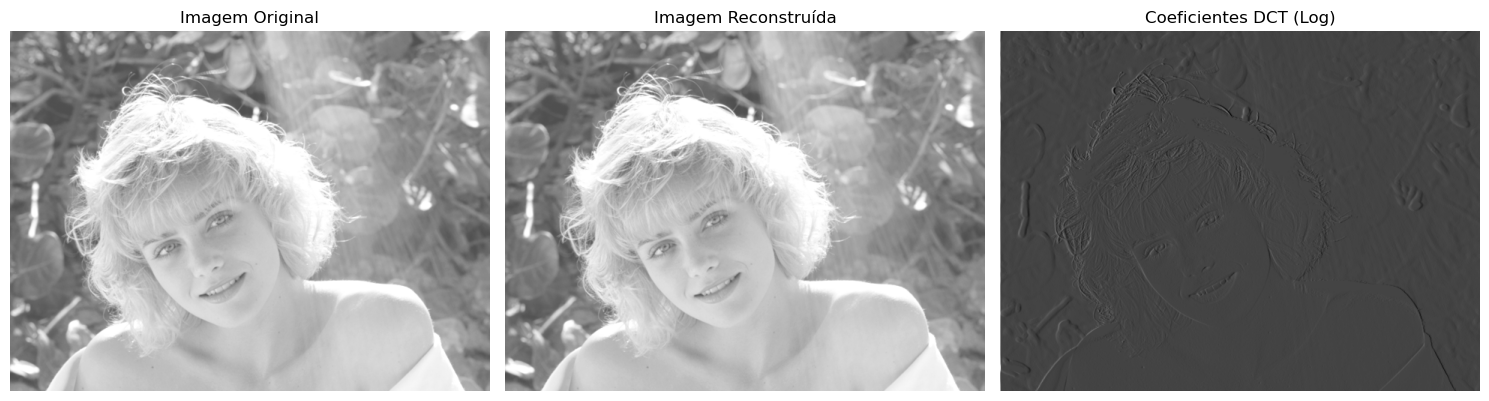

Entropia da imagem original: 7.1393776
Entropia da imagem de resíduos 4.018912
Erro da reconstrução: 0.0


In [6]:
# Visualização
# Imagem Original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

# Imagem Reconstruída
plt.subplot(1, 3, 2)
plt.imshow(rebuilt, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Reconstruída')
plt.axis('off')

# Coeficientes DCT
plt.subplot(1, 3, 3)
plt.imshow(residual, cmap='gray')
plt.title('Coeficientes DCT (Log)')
plt.axis('off')

plt.tight_layout()
plt.show()

# image entropy
def calcEntropy(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist.ravel()/hist.sum()
    logs = np.log2(hist+0.00001)
    entropy = -1 * (hist*logs).sum()

    return entropy

# Root Mean Square Error
def rmse_metric(img1, img2):
    return np.sqrt(np.mean((img1.astype("float") - img2.astype("float")) ** 2))
    
# Valores de Entropia

#Transformação nos valores da matriz de resíduos, possui valores negativos
min_val = np.min(residual)
shifted = (residual - min_val).astype(np.uint8)

print("Entropia da imagem original:", calcEntropy(imagem))
print("Entropia da imagem de resíduos", calcEntropy(shifted))
rmse = rmse_metric(imagem, rebuilt)
print(f"Erro da reconstrução: {rmse}")

## Avaliação de Outras funções preditoras

Esta etapa realiza a **Codificação Preditiva** em uma imagem em escala de cinza, gerando uma matriz de resíduos,
bem como sua inversa, e avalia a qualidade da reconstrução utilizando as métricas **RMSE** e **PSNR**.
Nossa implementação é feita a partir de uma função de alta ordem, assim,
é possível definir variados preditores e suas inversas para obter resultados distintos.

---

- Funções

  - `previous`: Realiza a predição baseada no valor do pixel anterior.
 
<table style="border-collapse: collapse;">
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: green; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
    <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
    <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
</table>

  - `square`: Usa a média de um quadrado 3x3 antes do pixel desejado.

<table style="border-collapse: collapse;">
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
  <tr>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
  <tr>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
    <tr>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: green; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
    <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
</table>


  - `prev3`: Usa a média dos valores dos 3 pixels mais próximos e anteriores ao predito.

<table style="border-collapse: collapse;">
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
  <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
    <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: red; border: 1px solid black;"></td>
    <td style="background-color: green; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
    <tr>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
    <td style="background-color: white; border: 1px solid black;"></td>
  </tr>
</table>

---

- Processamento

  1. **Aplicação da Codificação e Inversa:**
    - A função passa por todos os pixels e chama a função preditora, ou sua inversa.

---

- Avaliação

    Duas métricas quantitativas são calculadas para medir a qualidade do processo:

    1. RMSE `(rmse_metric(img, IDFT_REAL))`: Erro quadrático médio da reconstrução, deve ser 0, já que o método é sem perdas.
    2. Entropia `calcEntropy(img)`: Entropia da imagem, indica o número mínimo de bits por pixel necessários para representar a imagem,
        reflete a taxa de variação da imagem.

In [7]:
def square(x, y, image):
    if (x <= 2 or y <= 2):
        return img[y, x]

    sq = np.zeros((3,3), int)
    sq[0] = image[y-3, x-3:x]
    sq[1] = image[y-2, x-3:x]
    sq[2] = image[y-1, x-3:x]

    pred = np.floor(np.mean(sq))
    return img[y,x] - pred;

def square_inv(x, y, recons, residual):
    if (x <= 2 or y <= 2):
        return residual[y, x]

    sq = np.zeros((3,3), int)
    sq[0] = recons[y-3, x-3:x]
    sq[1] = recons[y-2, x-3:x]
    sq[2] = recons[y-1, x-3:x]
    pred = np.floor(np.mean(sq))

    return residual[y, x] + pred

def prev3(x, y, image):
    if (x < 1 or y < 1):
        return img[y, x]

    sq = np.zeros(3, int)
    sq[0:2] = image[y-1, x-1:x+1]
    sq[2] = image[y, x-1]

    pred = np.floor(np.mean(sq))
    return image[y,x] - pred;

def prev3_inv(x, y, recons, residual):
    if (x < 1 or y < 1):
        return residual[y, x]

    sq = np.zeros(3, int)
    sq[0:2] = recons[y-1, x-1:x+1]
    sq[2] = recons[y, x-1]

    pred = np.floor(np.mean(sq))
    return residual[y,x] + pred;

In [8]:
# Aplicação das Funções
img = imagem.copy()

residual_previous = prediction_comp(previous, img)
rebuilt_previous = prediction_decomp(previous_inv, residual)

residual_square = prediction_comp(square, img)
rebuilt_square = prediction_decomp(square_inv, residual)

residual_prev3= prediction_comp(prev3, img)
rebuilt_prev3 = prediction_decomp(prev3_inv, residual)

In [9]:
#Transformação nos valores da matriz de resíduos, possui valores negativos
min_val = np.min(residual_previous)
shifted_previous = (residual_previous - min_val).astype(np.uint8)

min_val = np.min(residual_square)
shifted_square = (residual_square - min_val).astype(np.uint8)

min_val = np.min(residual_prev3)
shifted_prev3 = (residual_prev3 - min_val).astype(np.uint8)

print("Entropia da imagem original:", calcEntropy(imagem))
print("Entropia da imagem de resíduos \"sprevious\"", calcEntropy(shifted_previous))
print("Entropia da imagem de resíduos \"square\"", calcEntropy(shifted_square))
print("Entropia da imagem de resíduos \"prev3\"", calcEntropy(shifted_prev3))

Entropia da imagem original: 7.1393776
Entropia da imagem de resíduos "sprevious" 4.018912
Entropia da imagem de resíduos "square" 5.202552
Entropia da imagem de resíduos "prev3" 3.9574394


## Funções de Compressão e Descompressão utilizando Codificação Preditiva e Huffman Codes

### Compressão e Descompressão sem perdas com Predição e Huffman

Nesta etapa do trabalho é simulo o processo de compressão e descompressão de uma imagem utilizando:

- **Codificação Preditiva**
- **Codificação de Huffman**

---

- `dft_jpeg_compression(img, file_name, QM, step=8)`  
    Realiza a **compressão de imagem** utilizando **Codificação Preditiva** e **codificação Huffman**.

    - **Parâmetros:**
        - `img`: imagem de entrada (matriz NumPy).
        - `path`: nome do arquivo `.huff` onde os dados comprimidos serão salvos.
        - `func`: função de predição.
    - **Processo:**
        1. Gera a *matriz de resíduos* com *Codificação Preditiva*.
        4. Codifica a **imagem de resíduos**  com **Huffman** (`huffman_encode`).
        5. Armazena os dados comprimidos (bitarrays, códigos e shapes) em um arquivo `.pkl` usando `pickle`.
    - **Retorna:**
        - Nenhum valor é retornado. A imagem comprimida é salva em `images/compressed/<file_name>`.

- `dft_jpeg_descompression(img_path, QM, step=8)`  
    Reconstrói a **imagem original** a partir de um arquivo comprimido `.pkl` gerado com `dft_jpeg_compression`.

    - **Parâmetros:**
        - `img_path`: caminho para o arquivo `.huff` com os dados comprimidos.
        - `func_inv`: inversa da função utilizada para predição
          
    - **Processo:**
        1. Carrega os dados comprimidos (`pickle.load`).
        2. Decodifica a **magnitude** e a **fase** com Huffman (`huffman_decode`).]
        3. Recupera a imagem com a inversa da preditora

    - **Retorna:**
        - `img_rec`: imagem reconstruída após descompressão.

---

- Visualização

    Mostra lado a lado:
    - A imagem original (`img`)
    - A imagem descomprimida (`img_rec`)

---

- Avaliação
  
    1. Taxa de compressão total: `Tamanho Original / Tamanho comprimido`
    2. Taxa de compressão desconsiderando o tamanho do dicionário, apenas a imagem gerada

In [61]:
def pred_huff_comp(func, image, path):
    residual = prediction_comp(func, image)
    
    codigos_huffman, dados_codificados = huffman_encode(residual)

    # Salvando dados comprimidos:
    dados_comprimidos = {
        'dados_codificados': dados_codificados,
        'codigos_huffman': codigos_huffman,
        'shape': residual.shape
    }
    
    path = os.path.join('images/compressed', file_name)
    dump(dados_comprimidos, path)

def pred_huff_decomp(func_inv, path):
    dados_comprimidos = load(img_path)

    residual = huffman_decode(dados_comprimidos)
    
    img_rec = prediction_decomp(func_inv, residual)

    return img_rec

In [62]:
# Compressão
img = imagem.copy()
img = img.astype(float)

file_name = 'marcie_comprimida_pred_huff.huff'

pred_huff_comp(previous, img, file_name)

dict_keys(['dados_codificados', 'codigos_huffman', 'shape'])
Dados comprimidos salvos em images/compressed/marcie_comprimida_pred_huff.huff


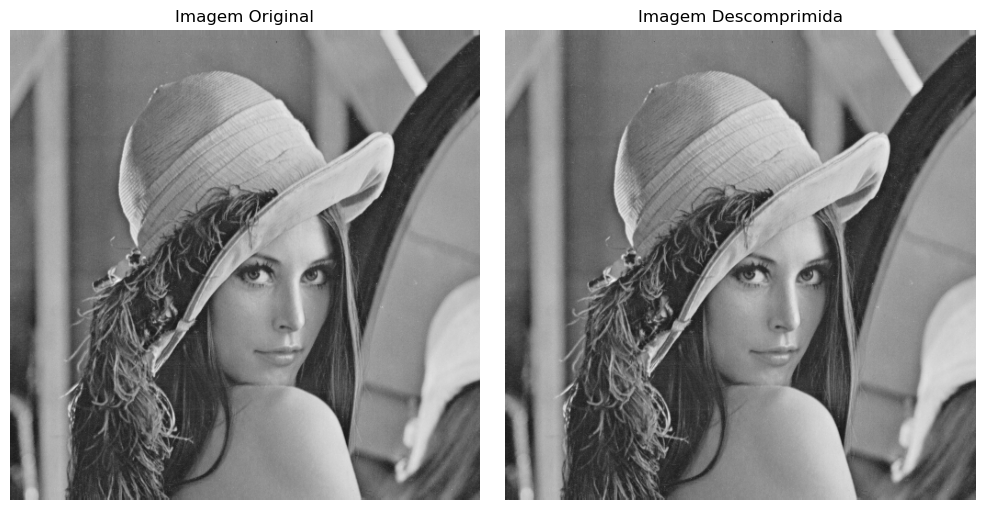

In [63]:
# Descompressão
img_path = 'images/compressed/marcie_comprimida_pred_huff.huff'
img_rec = pred_huff_decomp(previous_inv, img_path)

# Visualização
# Imagem Original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

# Imagem Descomprimida
plt.subplot(1, 3, 2)
plt.imshow(img_rec, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Descomprimida')
plt.axis('off')

plt.tight_layout()
plt.show()

In [64]:
with open("images/compressed/marcie_comprimida_pred_huff.huff", 'rb') as f:    
    data = pickle.load(f)
    codes_size = data['dados_codificados'][1]
    codes = data['dados_codificados'][0]

# Taxa de compressão
original_size = os.path.getsize(original_path) 
compressed_size = os.path.getsize("images/compressed/marcie_comprimida_pred_huff.huff")
taxa_de_compressao = original_size / compressed_size

#print(original_size, compressed_size, codes_size)
print(f"Taxa de compressão (com overhead) = {taxa_de_compressao}")
print(f"Taca de compressão (sem overhead) = ", original_size / (codes_size/8))

Taxa de compressão (com overhead) = 1.5182442018704578
Taca de compressão (sem overhead) =  1.5673506964968535


# Aqui é tests

In [14]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

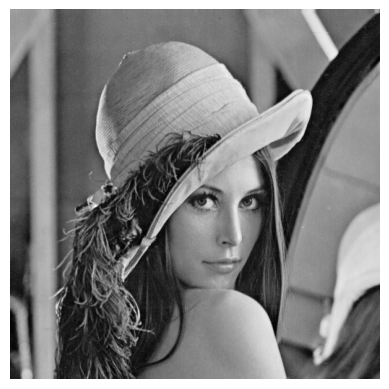

In [21]:
# Carregar a imagem em modo grayscale
original_path = 'images/pgm_bin/lena512.pgm'
imagem = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)

# Exibindo imagem
plt.imshow(imagem, cmap='gray')
plt.axis('off') 
plt.show()

# Função de predição e sua inversa

In [22]:
def previous(x, y, img):
    if (x == 0):
        return img[y, x]
    return  img[y, x] - img[y, x-1]

def previous_inv(x, y, recons, residual):
    if (x==0):
        return residual[y,x]
    return recons[y, x-1] + residual[y, x]

## Aplicação da função preditora

In [23]:
def prediction_comp(func, img):
    size = img.shape
    residual = np.zeros(size, int)
    img = img.astype(int)
    
    for y in range(0, size[0]):
        for x in range(0, size[1]):
            residual[y, x] = func(x, y, img)

    return residual

In [24]:
result = prediction_comp(previous, imagem)
print(result)
print(np.max(result), np.min(result))

[[162   0   0 ...  -1 -15 -27]
 [162   0   0 ...  -1 -15 -27]
 [162   0   0 ...  -1 -15 -27]
 ...
 [ 43   0   7 ...   4  -4  -2]
 [ 44   0  11 ...   4   1   3]
 [ 44   0  11 ...   4   1   3]]
175 -125


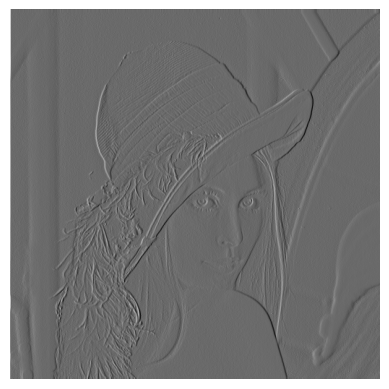

In [25]:
plt.imshow(result, cmap='gray')
plt.axis('off') 
plt.show()

# Diferença de entropia da Imagem Original vs Imagem de Resíduos

In [26]:
# image entropy
def calcEntropy(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist.ravel()/hist.sum()
    logs = np.log2(hist+0.00001)
    entropy = -1 * (hist*logs).sum()

    return entropy

In [27]:
print("Entropia da imagem original:", calcEntropy(imagem))

min_val = np.min(result)
shifted = result - min_val

print("Entropia da imagem de resíduos", calcEntropy(shifted.astype(np.uint8)))

Entropia da imagem original: 7.442466
Entropia da imagem de resíduos 5.069181


# Aplicação da Inversa da Predição

In [28]:
def prediction_decomp(func_inv, residual):
    size = residual.shape
    reconstructed = np.zeros(size, int)
    residual = residual.astype(int)
    
    for y in range(0, size[0]):
        for x in range(0, size[1]):
            reconstructed[y, x] = func_inv(x, y, reconstructed, residual)

    return reconstructed

In [29]:
rebuilt = prediction_decomp(previous_inv, result).astype(np.uint8)

print(np.min(rebuilt), np.max(rebuilt))

25 245


# Imagem reconstruída

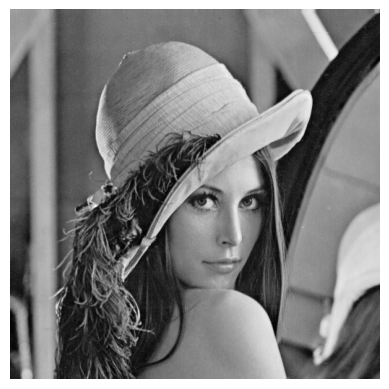

In [30]:
plt.imshow(rebuilt, cmap='gray')
plt.axis('off') 
plt.show()

In [31]:
# Root Mean Square Error
def rmse_metric(img1, img2):
    return np.sqrt(np.mean((img1.astype("float") - img2.astype("float")) ** 2))

rmse = rmse_metric(imagem, rebuilt)
print(f"Erro da reconstrução: {rmse}")

Erro da reconstrução: 0.0


# Melhorando a escrita em arquivo

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pickle
import os
import heapq
from collections import Counter

In [33]:
import numpy as np
from collections import Counter, defaultdict
import heapq
from bitarray import bitarray  # Importando bitarray

class Node:
    def __init__(self, symbol=None, freq=0):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):  # Necessário para heapq
        return self.freq < other.freq

def build_huffman_tree(frequencies):
    heap = [Node(symbol=sym, freq=freq) for sym, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        n1 = heapq.heappop(heap)
        n2 = heapq.heappop(heap)
        merged = Node(freq=n1.freq + n2.freq)
        merged.left = n1
        merged.right = n2
        heapq.heappush(heap, merged)

    return heap[0]  # raiz da árvore

def generate_huffman_codes(root):
    codes = {}

    def traverse(node, path=""):
        if node.symbol is not None:
            codes[node.symbol] = path
        else:
            traverse(node.left, path + "0")
            traverse(node.right, path + "1")

    traverse(root)
    return codes

def huffman_encode(matrix):
    dados = matrix.flatten().tolist()
    frequencies = Counter(dados)

    root = build_huffman_tree(frequencies)
    codes = generate_huffman_codes(root)

    # Codificar os dados usando bitarray
    encoded_bits = bitarray()
    for sym in dados:
        encoded_bits.extend(codes[sym])  # Adiciona os bits codificados

    return codes, encoded_bits  # Retorna a codificação como bitarray

def huffman_decode(dados_comprimidos):
    encoded_bits = dados_comprimidos['dados_codificados']
    codes = dados_comprimidos['codigos_huffman']
    shape = dados_comprimidos['shape']

    # Inverter o dicionário: bits -> símbolo
    reverse_codes = {v: k for k, v in codes.items()}
    
    decoded_data = []
    temp = ""
    for bit in encoded_bits:
        temp += str(bit)
        if temp in reverse_codes:
            decoded_data.append(reverse_codes[temp])
            temp = ""  # Reinicia a sequência de bits

    return np.array(decoded_data).reshape(shape)

def huffman_decode_dft(dados_comprimidos):
    def decode(encoded_bits, codes, shape):
        # Inverter o dicionário: bits -> símbolo
        reverse_codes = {v: k for k, v in codes.items()}
        
        decoded_data = []
        temp = ""
        for bit in encoded_bits:
            temp += str(bit)
            if temp in reverse_codes:
                decoded_data.append(reverse_codes[temp])
                temp = ""  # Reinicia a sequência de bits

        return np.array(decoded_data).reshape(shape)

    # Decodificar magnitude
    magnitude = decode(
        dados_comprimidos['dados_codificados_mag'],
        dados_comprimidos['codigos_huffman_mag'],
        dados_comprimidos['shape_mag']
    )
    
    # Decodificar fase
    fase = decode(
        dados_comprimidos['dados_codificados_phase'],
        dados_comprimidos['codigos_huffman_phase'],
        dados_comprimidos['shape_phase']
    )

    return magnitude, fase
# class NoHuffman:
#     def __init__(self, valor=None, freq=0, esq=None, dir=None):
#         self.valor = valor
#         self.freq = freq
#         self.esq = esq
#         self.dir = dir
    
#     def __lt__(self, outro):  # Necessário para usar o heapq
#         return self.freq < outro.freq

# def construir_arb_huffman(frequencias):
#     # Cria a heap com os nós folha
#     heap = [NoHuffman(valor, freq) for valor, freq in frequencias.items()]
#     heapq.heapify(heap)

#     # Construa a árvore
#     while len(heap) > 1:
#         no1 = heapq.heappop(heap)
#         no2 = heapq.heappop(heap)
#         no_novo = NoHuffman(freq=no1.freq + no2.freq, esq=no1, dir=no2)
#         heapq.heappush(heap, no_novo)

#     return heap[0]  # Retorna a raiz da árvore

# def gerar_codigos_huffman(raiz, prefixo="", codigos={}):
#     if raiz is None:
#         return
#     if raiz.valor is not None:
#         codigos[raiz.valor] = prefixo
#     gerar_codigos_huffman(raiz.esq, prefixo + "0", codigos)
#     gerar_codigos_huffman(raiz.dir, prefixo + "1", codigos)
#     return codigos

# # Função para aplicar a quantização e codificação de Huffman
# def huffman_encode(quant_coefs):
#     # Flatten a matriz para tratar os coeficientes DCT quantizados
#     quant_flat = quant_coefs.flatten()
    
#     # Contar a frequência dos coeficientes
#     frequencias = Counter(quant_flat)

#     # Construir a árvore de Huffman
#     raiz = construir_arb_huffman(frequencias)
    
#     # Gerar os códigos Huffman
#     codigos_huffman = gerar_codigos_huffman(raiz)
    
#     # Codificar a imagem (gerar a sequência binária)
#     dados_codificados = ''.join([codigos_huffman[p] for p in quant_flat])
    
#     return codigos_huffman, dados_codificados

# def huffman_decode(dados_comprimidos):
#     # Recupera os dados comprimidos e o dicionário de códigos Huffman
#     dados_codificados = dados_comprimidos['dados_codificados']
#     codigos_huffman = dados_comprimidos['codigos_huffman']
    
#     # Inverter o dicionário de códigos Huffman para mapear os prefixos para os valores
#     codigos_invertidos = {v: k for k, v in codigos_huffman.items()}
    
#     # Variáveis para armazenar os coeficientes quantizados
#     quant_coefs_rec = []
#     i = 0  # Posição no stream de dados codificados
    
#     # Descodificar os dados codificados
#     while i < len(dados_codificados):
#         # Tenta encontrar o código correspondente no stream de dados
#         for tamanho in range(1, len(dados_codificados) - i + 1):
#             prefixo = dados_codificados[i:i + tamanho]
#             if prefixo in codigos_invertidos:
#                 # Adiciona o valor correspondente à lista de coeficientes
#                 quant_coefs_rec.append(codigos_invertidos[prefixo])
#                 i += tamanho  # Avança a posição no stream
#                 break
    
#     # Converter a lista de coeficientes de volta para a forma matricial
#     shape = dados_comprimidos['shape']
#     quant_coefs_rec = np.array(quant_coefs_rec).reshape(shape)
    
#     return quant_coefs_rec

# import numpy as np

# def huffman_decode_dft(dados_comprimidos):
#     def decode(dados_codificados, codigos_huffman, shape):
#         # Inverter o dicionário de códigos Huffman
#         codigos_invertidos = {v: k for k, v in codigos_huffman.items()}
        
#         # Lista para armazenar os coeficientes
#         quant_coefs_rec = []
#         i = 0  # Índice no stream de bits
        
#         # Decodificação bit a bit
#         while i < len(dados_codificados):
#             for tamanho in range(1, len(dados_codificados) - i + 1):
#                 prefixo = dados_codificados[i:i + tamanho]
#                 if prefixo in codigos_invertidos:
#                     quant_coefs_rec.append(codigos_invertidos[prefixo])
#                     i += tamanho
#                     break
                    
#         return np.array(quant_coefs_rec).reshape(shape)
    
#     # Decodificar magnitude
#     magnitude = decode(
#         dados_comprimidos['dados_codificados_mag'],
#         dados_comprimidos['codigos_huffman_mag'],
#         dados_comprimidos['shape_mag']
#     )
#     print("OI")
    
#     # Decodificar fase
#     fase = decode(
#         dados_comprimidos['dados_codificados_phase'],
#         dados_comprimidos['codigos_huffman_phase'],
#         dados_comprimidos['shape_phase']
#     )
    
#     return magnitude, fase


In [34]:
huff = huffman_encode(result)

In [35]:
import sys
from bitarray import bitarray
sys.getsizeof(huff[0])

9304

In [36]:
menor = (huff[0], bitarray(huff[1]).tobytes(), len(huff[1]))
retorno = (menor[0], bitarray(menor[1]).to01()[:menor[2]])

In [37]:
print(len(retorno[1]), len(huff[1]))

1338197 1338197


In [38]:
retorno[1] == huff[1]

False

In [39]:
from bitarray import bitarray

In [40]:
# Função que realiza a transformada DCT
def dct_transform(img, step=8):

    size = img.shape                    # Shape da imagem
    DCT = np.zeros(size, dtype=float)   # Cria uma matriz para armazenar os coeficientes DCT

    for y in range(0, size[0], step):       # Percorre linhas de 8 em 8
        for x in range(0, size[1], step):   # Percorre colunas de 8 em 8
            
            dct = cv2.dct(img[y:y+step, x:x+step])   # Aplica DCT no bloco 8x8

            DCT[y:y+step, x:x+step] = dct     # Salva o bloco DCT

    return DCT

# Função que realiza a inversa da DCT (IDCT)
def idct_transform(dct_coefs, step=8):

    size = dct_coefs.shape
    IDCT = np.zeros(size, dtype=float)  # Cria uma matriz para armazenar a imagem reconstruída

    for y in range(0, size[0], step):       # Percorre linhas de 8 em 8
        for x in range(0, size[1], step):   # Percorre colunas de 8 em 8
            
            idct = cv2.idct(dct_coefs[y:y+step, x:x+step]) # Aplica IDCT 2D no bloco 8x8

            IDCT[y:y+step, x:x+step] = idct   # Salva o bloco reconstruído
    
    IDCT = IDCT + 128 # Desfaz o deslocamento de 128

    return IDCT

In [41]:
def quantizacao_DCT(DCT, QM, step=8):
    
    np.set_printoptions(precision=3)
    np.set_printoptions(suppress=True)
    
    size = DCT.shape
    quant_coefs = np.zeros(size, dtype=float) # Matriz para armazenar os coeficientes quantizados
    dc_array = []                             # Array para armazenar os coeficientes DC originais
    
    for y in range(0,size[0],step):
        for x in range(0,size[1],step):

            dct = DCT[y:y+step, x:x+step]

            DC = dct[0,0]            # Adquire o coeficiente DC
            dct = np.divide(dct, QM) # Divive a DCT pela matriz de quantização
            dct = dct.round()        # Arredondamento da matriz quantizada

            quant_coefs[y:y+step, x:x+step] = dct # Salva o bloco quantizado
            dc_array.append(DC)
    
    return quant_coefs, dc_array

def desquantization_DCT(quant_coefs, dc_array, QM, useDC=True, step=8):

    np.set_printoptions(precision=3)
    np.set_printoptions(suppress=True)
    
    size = quant_coefs.shape
    original_coefs = np.zeros(size, dtype=float)

    for y in range(0,size[0],step):
        for x in range(0,size[1],step):
            # Multiplica a matriz quantizada pela matriz de quantização
            dct = np.multiply(quant_coefs[y:y+step, x:x+step], QM)

            if (useDC == True):
                dct[0,0] = dc_array[0]  # Recupera o coeficiente DC original
                dc_array = dc_array[1:] # Retira o primeiro elemento do array
        
            original_coefs[y:y+step, x:x+step] = dct
    
    return original_coefs

In [42]:
 # Converte uma matriz 8x8 em uma lista usando o percurso zigue-zague  
def zigzag(block):  
    z = np.empty(64, dtype=block.dtype)
    index = -1
    for i in range(0, 15):
        bound = 0 if i < 8 else i - 7
        for j in range(bound, i - bound + 1):
            if i % 2 == 0:
                x, y = j, i - j
            else:
                x, y = i - j, j
            if x < 8 and y < 8:
                index += 1
                z[index] = block[x][y]
    return z

# Converte uma lista de 64 elementos em uma matriz 8x8 usando percurso zigue-zague inverso
def inverse_zigzag(array):
    block = np.empty((8, 8), dtype=array.dtype)
    index = -1
    for i in range(0, 15):
        bound = 0 if i < 8 else i - 7
        for j in range(bound, i - bound + 1):
            if i % 2 == 0:
                x, y = j, i - j
            else:
                x, y = i - j, j
            if x < 8 and y < 8:
                index += 1
                block[x][y] = array[index]
    return block

In [43]:
def dct_jpeg_compression(img, file_name, step=8):
    
    img = img.astype(float)             
    img = img - 128                     # Centraliza os valores da imagem em torno de 0

    # Matriz de Quantização
    QM = np.matrix([[16, 11, 10, 16, 24, 40, 51, 61], 
                    [12, 12, 14, 19, 26, 58, 60, 55],
                    [14, 13, 16, 24, 40, 57, 69, 56],
                    [14, 17, 22, 29, 51, 87, 80, 62],
                    [18, 22, 37, 56, 68, 109, 103, 77],
                    [24, 35, 55, 64, 81, 104, 113, 92],
                    [49, 64, 78, 87, 103, 121, 120, 101],
                    [72, 92, 95, 98, 112, 100, 103, 99]])

    # 1. Realiza Transformada DCT
    DCT = dct_transform(img)
    
    # 2. Quantização
    quant_coefs, dc_array = quantizacao_DCT(DCT, QM)
    
    # 3. Oredenação Zigue-Zague (Ainda tem que implementar)
    zigzagged_blocks = np.empty_like(quant_coefs)
    for i in range(0, quant_coefs.shape[0], 8):
        for j in range(0, quant_coefs.shape[1], 8):
            block = quant_coefs[i:i+8, j:j+8]
            zigzagged_blocks[i:i+8, j:j+8] = zigzag(block).reshape((8, 8)) 
    
    # 4. Codificação Huffman (Codificação por Entropia)
    codigos_huffman, dados_codificados = huffman_encode(zigzagged_blocks)

    # Salvando dados comprimidos:
    dados_comprimidos = {
        'dados_codificados': dados_codificados,
        'codigos_huffman': codigos_huffman,
        'shape': quant_coefs.shape,
        'dc_array': dc_array
    }
    
    path = os.path.join('images/compressed', file_name)
    dump(dados_comprimidos, path)

    # Desfaz o deslocamento de 128 da imagem
    img = img + 128


def dct_jpeg_descompression(img_path, step=8):

    # Matriz de Quantização
    QM = np.matrix([[16, 11, 10, 16, 24, 40, 51, 61], 
                    [12, 12, 14, 19, 26, 58, 60, 55],
                    [14, 13, 16, 24, 40, 57, 69, 56],
                    [14, 17, 22, 29, 51, 87, 80, 62],
                    [18, 22, 37, 56, 68, 109, 103, 77],
                    [24, 35, 55, 64, 81, 104, 113, 92],
                    [49, 64, 78, 87, 103, 121, 120, 101],
                    [72, 92, 95, 98, 112, 100, 103, 99]])

    dados_comprimidos = load(img_path)

    # Coeficientes quantizados e dc_array recuperados
    zigzagged_blocks = huffman_decode(dados_comprimidos)
    dc_array = dados_comprimidos['dc_array']
    shape = dados_comprimidos['shape']

    # Reverter Zigue Zague
    quant_coefs_rec = np.zeros(shape)
    for i in range(0, shape[0], 8):
        for j in range(0, shape[1], 8):
            zigzag_seq = zigzagged_blocks[i:i+8, j:j+8].flatten()
            block = inverse_zigzag(zigzag_seq)
            quant_coefs_rec[i:i+8, j:j+8] = block
    # Desquantização
    original_coefs = desquantization_DCT(quant_coefs_rec, dc_array, QM)

    # Realiza a Transformada Inversa (IDCT)
    img_rec = idct_transform(original_coefs, step)

    return img_rec

# Definição de funções de leitura e escrita

In [44]:
def dump(dados, path):
    bin_string = dados['dados_codificados']
    data_bytes = bitarray(bin_string).tobytes()

    dados['dados_codificados'] = (data_bytes, len(bin_string))

    if (dados.get('dc_array')):
        dados['dc_array'] = np.array(dados['dc_array'], np.float16)
    
    with open(path, 'wb') as f:
        pickle.dump(dados, f)

    print(dados.keys())
    print(f"Dados comprimidos salvos em {path}")

def load(path):
    with open(path, 'rb') as f:
        dados_comprimidos = pickle.load(f)

    codigos = dados_comprimidos['dados_codificados']
    bin_string = bitarray(codigos[0]).to01()[:codigos[1]]
    
    dados_comprimidos['dados_codificados'] = bin_string

    return dados_comprimidos
    

In [45]:
# Compressão
img = imagem.copy()
img = img.astype(float)

file_name = 'marcie_comprimida_jpeg_dct.huff'
dct_jpeg_compression(img, file_name)

dict_keys(['dados_codificados', 'codigos_huffman', 'shape', 'dc_array'])
Dados comprimidos salvos em images/compressed/marcie_comprimida_jpeg_dct.huff


In [46]:
with open("images/compressed/marcie_comprimida_jpeg_dct.huff", 'rb') as f:    
    data = pickle.load(f)
    codes_size = data['dados_codificados'][1]
    codes = data['dados_codificados'][0]
    print(len(codes), codes_size/8) 

# Taxa de compressão
original_size = os.path.getsize(original_path) 
compressed_size = os.path.getsize("images/compressed/marcie_comprimida_jpeg_dct.huff")
taxa_de_compressao = original_size / compressed_size

print(data.keys())
print(len(data['dc_array'])*64)
print(codes_size)

#print(original_size, compressed_size, codes_size)
print(f"Taxa de compressão (com overhead) = {taxa_de_compressao}")
print(f"Taca de compressão (sem overhead) = ", original_size / (codes_size/8))

47062 47062.0
dict_keys(['dados_codificados', 'codigos_huffman', 'shape', 'dc_array'])
262144
376496
Taxa de compressão (com overhead) = 4.551464333454855
Taca de compressão (sem overhead) =  5.570906463813692


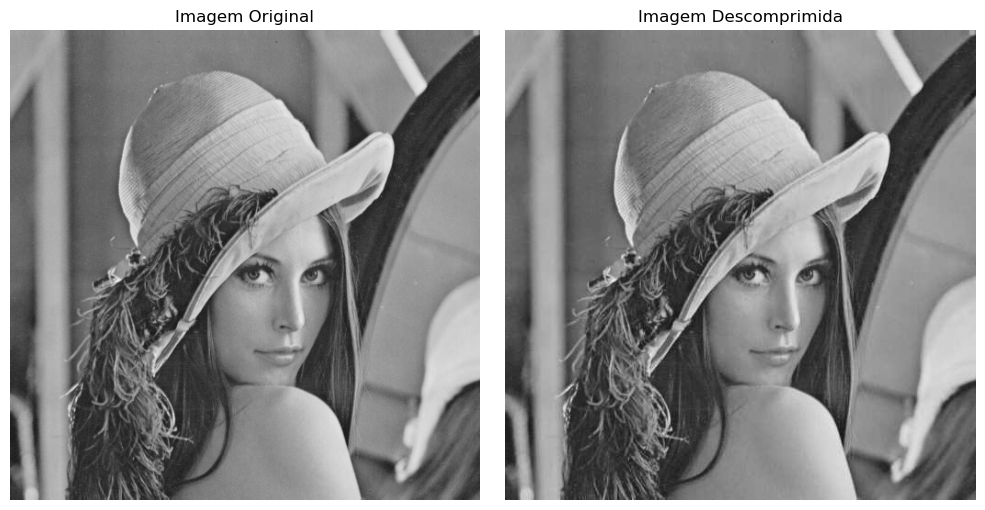

In [47]:
# Descompressão
img_path = 'images/compressed/marcie_comprimida_jpeg_dct.huff'
img_rec = dct_jpeg_descompression(img_path)

# Visualização
# Imagem Original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

# Imagem Descomprimida
plt.subplot(1, 3, 2)
plt.imshow(img_rec, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Descomprimida')
plt.axis('off')

plt.tight_layout()
plt.show()

In [48]:
# Métricas de Erro
rmse = rmse_metric(img, img_rec)
print(f"Métrica RMSE: {rmse}")
psnr = cv2.PSNR(img, img_rec)
print(f"Métrica PSNR: {psnr} dB")

Métrica RMSE: 4.091925130988468
Métrica PSNR: 35.89225003014463 dB


# Compressão com predição e huffman

In [49]:
def pred_huff_comp(func, image, path):
    residual = prediction_comp(func, image)
    
    codigos_huffman, dados_codificados = huffman_encode(residual)

    # Salvando dados comprimidos:
    dados_comprimidos = {
        'dados_codificados': dados_codificados,
        'codigos_huffman': codigos_huffman,
        'shape': residual.shape
    }
    
    path = os.path.join('images/compressed', file_name)
    dump(dados_comprimidos, path)

def pred_huff_decomp(func_inv, path):
    dados_comprimidos = load(img_path)

    residual = huffman_decode(dados_comprimidos)
    
    img_rec = prediction_decomp(func_inv, residual)

    return img_rec

In [50]:
# Compressão
img = imagem.copy()
img = img.astype(float)

file_name = 'marcie_comprimida_pred_huff.huff'

pred_huff_comp(previous, img, file_name)

dict_keys(['dados_codificados', 'codigos_huffman', 'shape'])
Dados comprimidos salvos em images/compressed/marcie_comprimida_pred_huff.huff


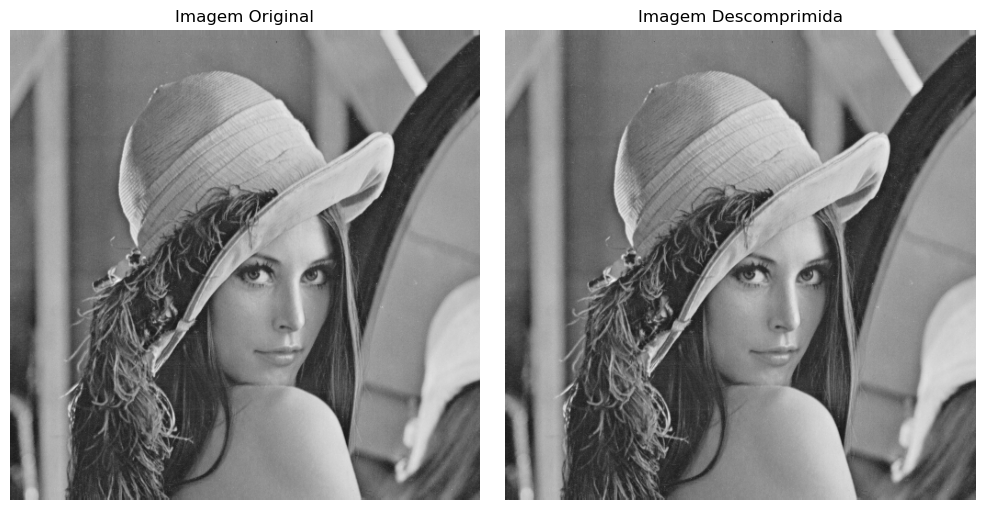

In [51]:
# Descompressão
img_path = 'images/compressed/marcie_comprimida_pred_huff.huff'
img_rec = pred_huff_decomp(previous_inv, img_path)

# Visualização
# Imagem Original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

# Imagem Descomprimida
plt.subplot(1, 3, 2)
plt.imshow(img_rec, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Descomprimida')
plt.axis('off')

plt.tight_layout()
plt.show()

In [52]:
with open("images/compressed/marcie_comprimida_pred_huff.huff", 'rb') as f:    
    data = pickle.load(f)
    codes_size = data['dados_codificados'][1]
    codes = data['dados_codificados'][0]

# Taxa de compressão
original_size = os.path.getsize(original_path) 
compressed_size = os.path.getsize("images/compressed/marcie_comprimida_pred_huff.huff")
taxa_de_compressao = original_size / compressed_size

#print(original_size, compressed_size, codes_size)
print(f"Taxa de compressão (com overhead) = {taxa_de_compressao}")
print(f"Taca de compressão (sem overhead) = ", original_size / (codes_size/8))

167275 167274.625
Taxa de compressão (com overhead) = 1.5182442018704578
Taca de compressão (sem overhead) =  1.5673506964968535


In [53]:
def square(x, y, image):
    if (x <= 2 or y <= 2):
        return img[y, x]

    sq = np.zeros((3,3), int)
    sq[0] = image[y-3, x-3:x]
    sq[1] = image[y-2, x-3:x]
    sq[2] = image[y-1, x-3:x]

    pred = np.floor(np.mean(sq))
    return img[y,x] - pred;

def square_inv(x, y, recons, residual):
    if (x <= 2 or y <= 2):
        return residual[y, x]

    sq = np.zeros((3,3), int)
    sq[0] = recons[y-3, x-3:x]
    sq[1] = recons[y-2, x-3:x]
    sq[2] = recons[y-1, x-3:x]
    pred = np.floor(np.mean(sq))

    return residual[y, x] + pred

In [54]:
def prev4(x, y, image):
    if (x < 1 or y < 1):
        return img[y, x]

    sq = np.zeros(3, int)
    sq[0:2] = image[y-1, x-1:x+1]
    sq[2] = image[y, x-1]

    pred = np.floor(np.mean(sq))
    return image[y,x] - pred;

def prev4_inv(x, y, recons, residual):
    if (x < 1 or y < 1):
        return residual[y, x]

    sq = np.zeros(3, int)
    sq[0:2] = recons[y-1, x-1:x+1]
    sq[2] = recons[y, x-1]

    pred = np.floor(np.mean(sq))
    return residual[y,x] + pred;

In [55]:
# Compressão
img = imagem.copy()
img = img.astype(float)

file_name = 'marcie_comprimida_pred.huff'

pred_huff_comp(prev4, img, file_name)

dict_keys(['dados_codificados', 'codigos_huffman', 'shape'])
Dados comprimidos salvos em images/compressed/marcie_comprimida_pred.huff


In [56]:
with open("images/compressed/marcie_comprimida_pred.huff", 'rb') as f:    
    data = pickle.load(f)
    codes_size = data['dados_codificados'][1]
    codes = data['dados_codificados'][0]
    #print(len(codes), codes_size/8) 

# Taxa de compressão
original_size = os.path.getsize(original_path) 
compressed_size = os.path.getsize("images/compressed/marcie_comprimida_pred_square.huff")
taxa_de_compressao = original_size / compressed_size

#print(original_size, compressed_size, codes_size)
print(f"Taxa de compressão (com overhead) = {taxa_de_compressao}")
print(f"Taca de compressão (sem overhead) = ", original_size / (codes_size/8))

Taxa de compressão (com overhead) = 1.227631997902268
Taca de compressão (sem overhead) =  1.6437079947838298


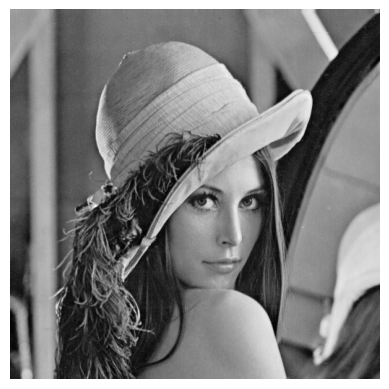

Erro da reconstrução: 0.0


In [57]:
img_path = 'images/compressed/marcie_comprimida_pred.huff'
rebuilt = pred_huff_decomp(prev4_inv, file_name)

plt.imshow(rebuilt, cmap='gray')
plt.axis('off') 
plt.show()

# Root Mean Square Error
def rmse_metric(img1, img2):
    return np.sqrt(np.mean((img1.astype("float") - img2.astype("float")) ** 2))

rmse = rmse_metric(imagem, rebuilt)
print(f"Erro da reconstrução: {rmse}")